# Long-term longitudinal analysis of 4,187 participants reveals new insights into determinants of clonal hematopoiesis

In [1]:
library(data.table)
library(dplyr)
library(stringr)
library(tidyr)
library(readxl)
library(ggplot2)
library(ggpubr)
library(cowplot)
theme_set(theme_cowplot())



Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend




In [4]:
################## inverse-normal transformation
INT_yang2012 <- function(x){
  y <- qnorm((rank(x, na.last='keep') - 0.5)/ sum(!is.na(x)))
  return(y)
}
##################

In [2]:
setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/pheno/")

## CHIP  

In [ ]:
### All 4,187 Samples w/o Heme CA 
# aric_baseline_n_v05 <- fread("aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.correct_lipids.Jun3May2023.csv", 
  #                           header=T)

# nrow(aric_baseline_n_v05)

# Exclude Prev. CH 
# Recalculated INT values in this subset
### Curated dataset for main Epi Analysis
# aric_baseline_n_v05.noPrevCH <- fread("aric_baseline_n_v05_N3730.pheno_ch_status.noHemeCA.correct_lipids.FinalDataset_4_glm.July132023.csv", 
  #                           header=T)

# nrow(aric_baseline_n_v05.noPrevCH)

In [3]:
load("Expansion_rate_input_data.01Dec2023.rda")

In [6]:
ls()

[1] "INT_yang2012"                                          
[2] "aric_baseline_n_v05"                                   
[3] "aric_baseline_n_v05.noPrevCH"                          
[4] "cln_grt.vaf2.DP20_base.corrected"                      
[5] "cln_grt.vaf2.DP20_base.corrected_ordered"              
[6] "cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected"        
[7] "cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered"
[8] "cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected"          
[9] "cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered"

In [ ]:
## from "2.1.3.Expansion_Rate.ipyt"

In [4]:
## Growth rate model 1
cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2_v2 <- cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2
cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2_v2[cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2_v2==1e-4] <- 0.001

summary(cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2)

summary(cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2_v2)

## "logdVAF_by_dT_ver2"
cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT_ver2 <- log(cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5/cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2_v2)/cln_grt.vaf2.DP20_base.corrected_ordered$dAge

summary(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT)
summary(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT_ver2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00010 0.00010 0.00010 0.02503 0.02381 0.47100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00100 0.00100 0.00100 0.02558 0.02381 0.47100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.07376 0.29399 0.22956 0.33841 1.27467 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.07376 0.18629 0.15973 0.22457 0.94572 

In [ ]:
######## Main Analysis: overall genes with >=10 clones
## no dAge adjustment

# model1 <- cln_grt.vaf2.DP20_base.corrected_ordered %>%     
  #      lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Gene_Group_R882 + Variant_type + Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
   #        INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
    #                chd_is_base + 
     #      age_base + chol_med_base +         
      #     log(DP.v2) +  v2_vs_other + 
       #    center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) 

# summary(model1)

# mod1_dat <- as.data.frame(summary(model1)$coefficients, stringsAsFactors = F)

# names(mod1_dat) <- c("Estimate", "SE","t", "P")
# mod1_dat$Exposures <- row.names(mod1_dat)
# str(mod1_dat)

# mod1_dat$beta <- round(mod1_dat$Estimate, 3)

# mod1_dat$beta_CI95 <- paste0(mod1_dat$beta, " [",formatC(round(( mod1_dat$Estimate - 1.96 * mod1_dat$SE),3), 
  #                                                       digits = 3, format = "f"),
   #                                  ", ",
    #                                 formatC(round(( mod1_dat$Estimate + 1.96 * mod1_dat$SE),3), 
     #                                        digits = 3, format = "f"), 
      #                               "]")
# mod1_dat$P_val <- formatC(x = mod1_dat$P, digits = 1,format = "E")

# (mod1_dat)

In [5]:
## Growth rate model 2:
## "cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered"
cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2_v2 <- cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2

cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2_v2[cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2_v2==1e-4] <- 0.001

summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2)

summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2_v2)

## "logdVAF_by_dT_ver2"
cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$logdVAF_by_dT_ver2 <- log(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v5/cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2_v2)/cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$dAge

summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$logdVAF_by_dT_ver2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00010 0.00010 0.00010 0.03345 0.03375 0.47100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00100 0.00100 0.00100 0.03395 0.03375 0.47100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.06682 0.18316 0.15750 0.23209 0.94572 

In [ ]:
## no dAge adjustment 

# model2 <- cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%     
  #      lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Gene_Group_R882 + Variant_type + Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
   #        INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
    #                chd_is_base + 
     #      age_base +  chol_med_base +       
      #     log(DP.v2) +  v2_vs_other + 
       #    center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) 

# summary(model2)

# mod2_dat <- as.data.frame(summary(model2)$coefficients, stringsAsFactors = F)

# names(mod2_dat) <- c("Estimate", "SE","t", "P")

# mod2_dat$Exposures <- row.names(mod2_dat)

# str(mod2_dat)

# mod2_dat$beta <- round(mod2_dat$Estimate, 3)

# mod2_dat$beta_CI95 <- paste0(mod2_dat$beta, " [",formatC(round(( mod2_dat$Estimate - 1.96 * mod2_dat$SE),3), digits = 3, format = "f"),
 #                                    ", ",
  #                                   formatC(round(( mod2_dat$Estimate + 1.96 * mod2_dat$SE),3), digits = 3, format = "f"), 
   #                                  "]")

# mod2_dat$P_val <- formatC(x = mod2_dat$P, digits = 1,format = "E")

# head(mod2_dat)

## Passenger mutations

#### Tier 1

In [9]:
# Tier 1:
synon_base <- fread("/medpop/esp2/mesbah/datasets/CHIP/ARIC/hiseq_vcf/baseline/all_HiSeq_baseline.tsv.gz", 
                    header=T)

## hiseqid "1" == "31684"
## "31684" == "J208038" | "A10238"
# Read synonymous SNV data
## filter: 
synon_base$Sample_ID[synon_base$Sample_ID==1] <- "31684"

# varID
synon_base$varID <- paste(synon_base$CHROM, 
                          synon_base$POS, 
                          synon_base$REF, 
                          synon_base$ALT, 
                          sep="_")

## Nucleotide Change
synon_base$nuc_subs <- paste(synon_base$REF, 
                             synon_base$ALT, 
                             sep=">")
## PASS or weak_evidence
synon_base <- synon_base %>% filter(FILTER %in% 
                             c("PASS", 
                               "weak_evidence"))
####
synon_base <- synon_base %>% 
  filter(FORMAT== "GT:AD:AF:DP:F1R2:F2R1:SB") %>% 
  separate(GT, c("GT","AD","VAF","DP","F1R2","F2R1", "SB"), 
           ":", convert = TRUE)

summary(synon_base$VAF)
table(synon_base$GT, exclude = NULL)

## split AD
synon_base <- synon_base %>% separate(AD, c("AD_REF","AD_ALT"), ",", convert = TRUE)

summary(synon_base$AD_ALT)

summary(synon_base$DP)

## 

sort(table(synon_base$nuc_subs))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002226 0.055000 0.075000 0.102487 0.125000 0.350000 


  0/1 
99519 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   6.196   4.000 644.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   40.00   65.00   82.88   96.00 2769.00 


ACC>TTT   CG>TA   CA>AG     A>C     T>G     G>C     C>G     T>A     A>T     C>A 
      1       1       2     308     430     601     629     632     642    2374 
    G>T     G>A     C>T     A>G     T>C 
   9419   15800   16569   25907   26204 


 TRUE 
99519 


FALSE  TRUE 
19603 79916 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002226 0.055000 0.075000 0.102487 0.125000 0.350000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002226 0.052000 0.068000 0.099526 0.103000 0.350000 

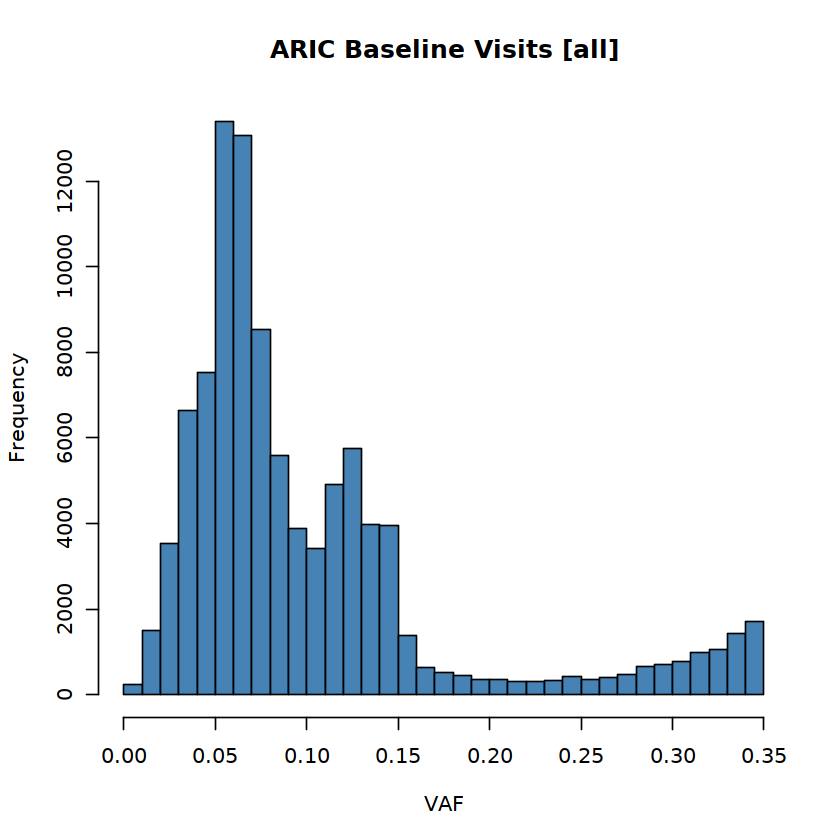

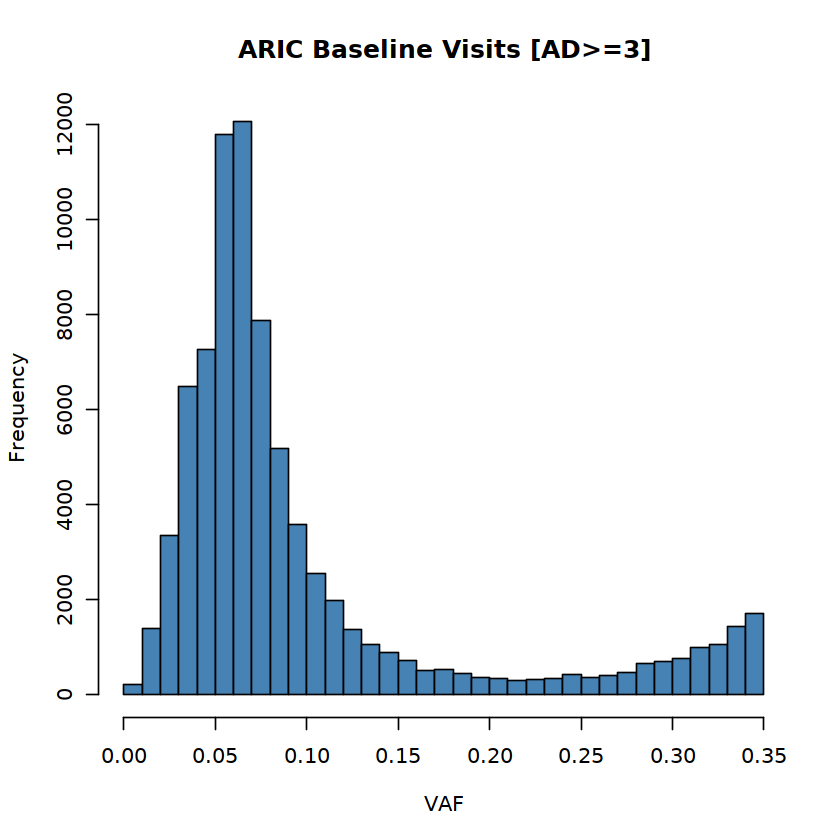

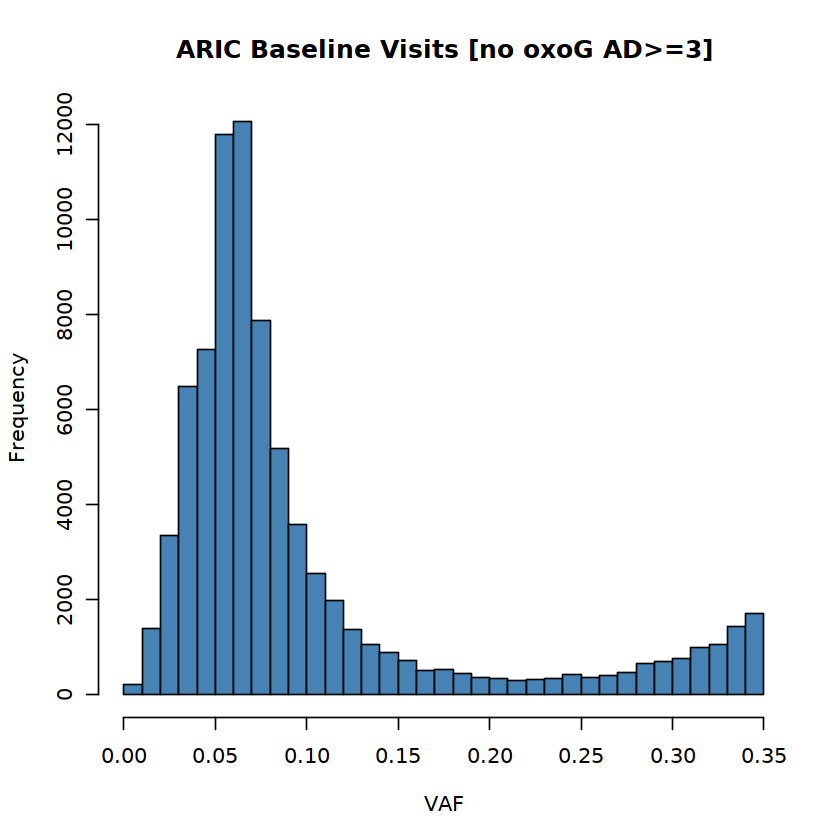

In [17]:
table(synon_base$AD_REF>2, exclude = NULL)

table(synon_base$AD_ALT>2, exclude = NULL)


summary(synon_base$VAF[synon_base$AD_ALT>1])
summary(synon_base$VAF[synon_base$AD_ALT>2])
##
hist(synon_base$VAF,breaks=40,col='steelblue',xlab="VAF",main="ARIC Baseline Visits [all]")
hist(synon_base$VAF[synon_base$AD_ALT>2],breaks=40,col='steelblue',xlab="VAF",main="ARIC Baseline Visits [AD>=3]")

hist(synon_base$VAF[synon_base$AD_ALT>2 & (synon_base$nuc_subs!="C>A" | synon_base$nuc_subs!="G>T")],breaks=40,col='steelblue',xlab="VAF",main="ARIC Baseline Visits [no oxoG AD>=3]")

#### Tier 2

In [14]:
# Tier 2:
## vaf<30%, DP<=400; no dbsnp
synon_base.qcd <- fread("/medpop/esp2/mesbah/datasets/CHIP/ARIC/hiseq_vcf/baseline/all_HiSeq_baseline.mpos10_45.dp20_400.vaf35.tsv.gz", header=T)

synon_base.qcd$Sample_ID[synon_base.qcd$Sample_ID==1] <- "31684"

# varID
synon_base.qcd$varID <- paste(synon_base.qcd$CHROM, 
                          synon_base.qcd$POS, 
                          synon_base.qcd$REF, 
                          synon_base.qcd$ALT, 
                          sep="_")

## Nucleotide Change
synon_base.qcd$nuc_subs <- paste(synon_base.qcd$REF, 
                             synon_base.qcd$ALT, 
                             sep=">")

## PASS or weak_evidence
synon_base.qcd <- synon_base.qcd %>% filter(FILTER %in% 
                             c("PASS", 
                               "weak_evidence"))
####
synon_base.qcd <- synon_base.qcd %>% 
  filter(FORMAT== "GT:AD:AF:DP:F1R2:F2R1:SB") %>% 
  separate(GT, c("GT","AD","VAF","DP","F1R2","F2R1", "SB"), 
           ":", convert = TRUE)

summary(synon_base.qcd$VAF)

table(synon_base.qcd$GT, exclude = NULL)

## split AD
synon_base.qcd <- synon_base.qcd %>% separate(AD, c("AD_REF","AD_ALT"), ",", convert = TRUE)

summary(synon_base.qcd$AD_ALT)

summary(synon_base.qcd$DP)

## 

sort(table(synon_base.qcd$nuc_subs))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.009221 0.053000 0.069000 0.082617 0.110000 0.350000 


  0/1 
60215 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.412   3.000 122.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   38.00   63.00   73.69   88.00  400.00 


CG>TA CA>AG   T>G   A>C   C>G   G>C   A>T   T>A   C>A   G>A   G>T   C>T   A>G 
    1     2    80    96   132   146   392   412  1559  5465  7230  7321 18592 
  T>C 
18787 


 TRUE 
60215 


FALSE  TRUE 
14745 45470 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.009221 0.053000 0.069000 0.082617 0.110000 0.350000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.009221 0.049000 0.063000 0.072582 0.081000 0.350000 

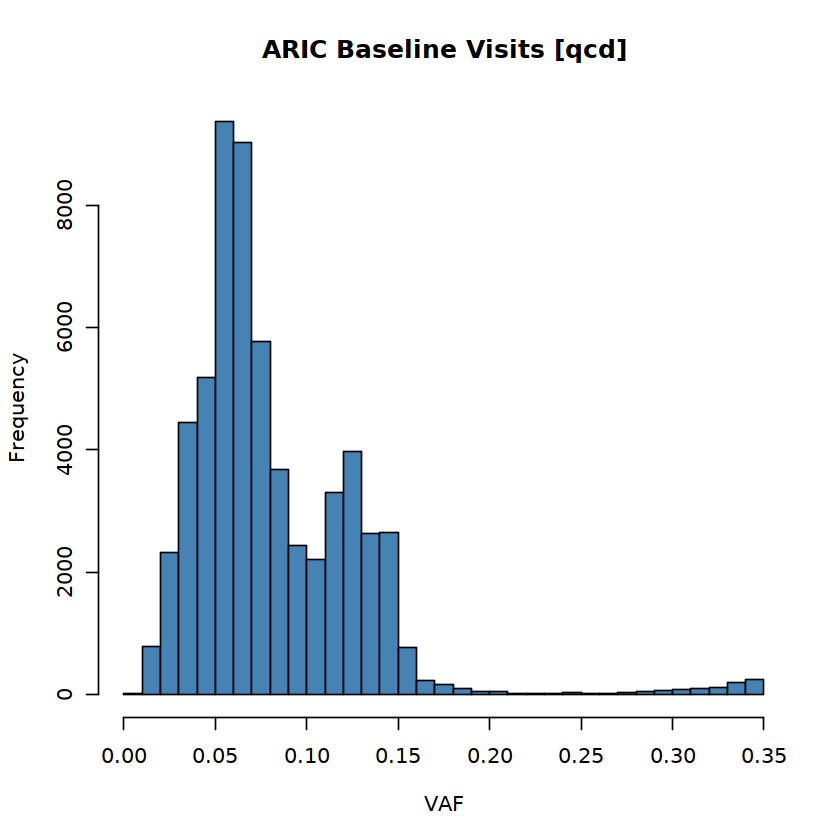

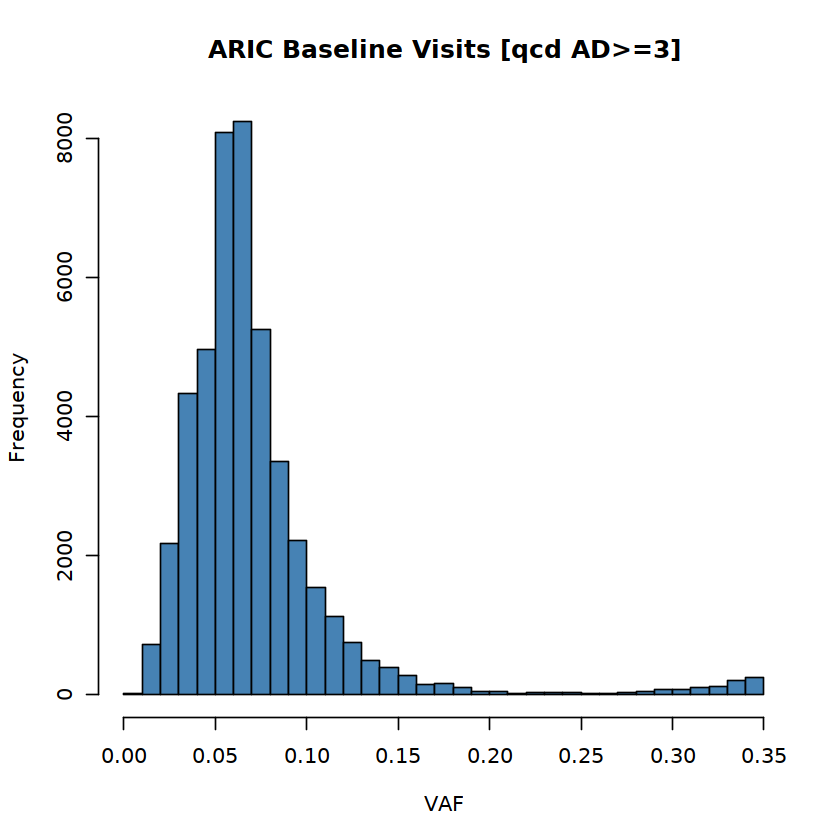

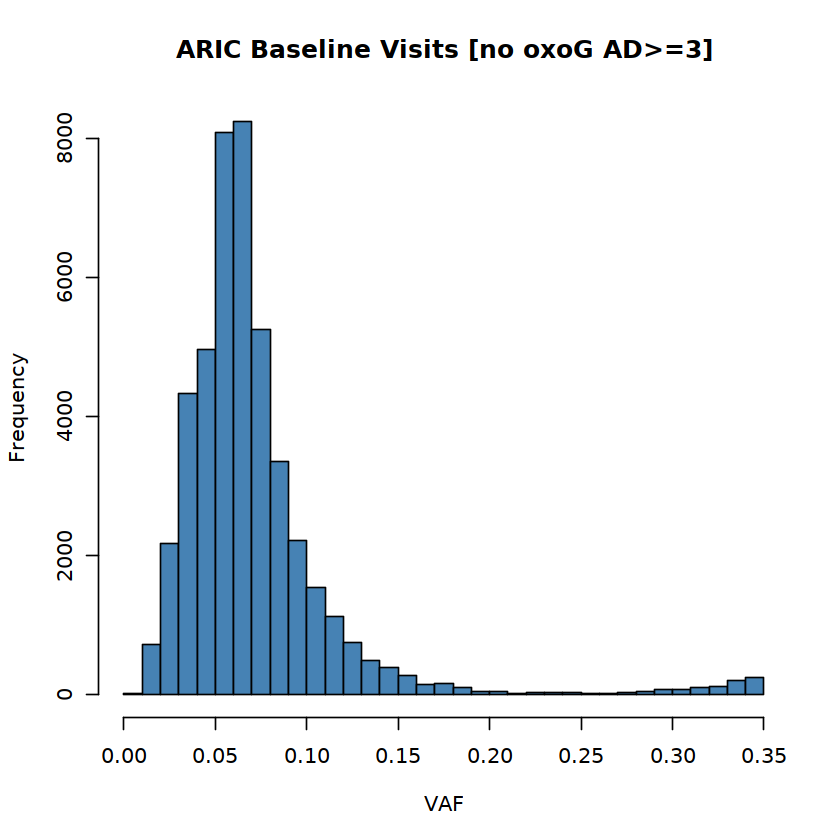

In [16]:
table(synon_base.qcd$AD_REF>2, exclude = NULL)

table(synon_base.qcd$AD_ALT>2, exclude = NULL)


summary(synon_base.qcd$VAF[synon_base.qcd$AD_ALT>1])
summary(synon_base.qcd$VAF[synon_base.qcd$AD_ALT>2])
##
hist(synon_base.qcd$VAF,breaks=40,
     col='steelblue',
     xlab="VAF",
     main="ARIC Baseline Visits [qcd]")

hist(synon_base.qcd$VAF[synon_base.qcd$AD_ALT>2],
     breaks=40,
     col='steelblue',
     xlab="VAF",
     main="ARIC Baseline Visits [qcd AD>=3]")

hist(synon_base.qcd$VAF[synon_base.qcd$AD_ALT>2 & (synon_base.qcd$nuc_subs!="C>A" | synon_base.qcd$nuc_subs!="G>T")],
     breaks=40,
     col='steelblue',
     xlab="VAF",
     main="ARIC Baseline Visits [no oxoG AD>=3]")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   40.00   65.00   82.88   96.00 2769.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   38.00   63.00   73.69   88.00  400.00 

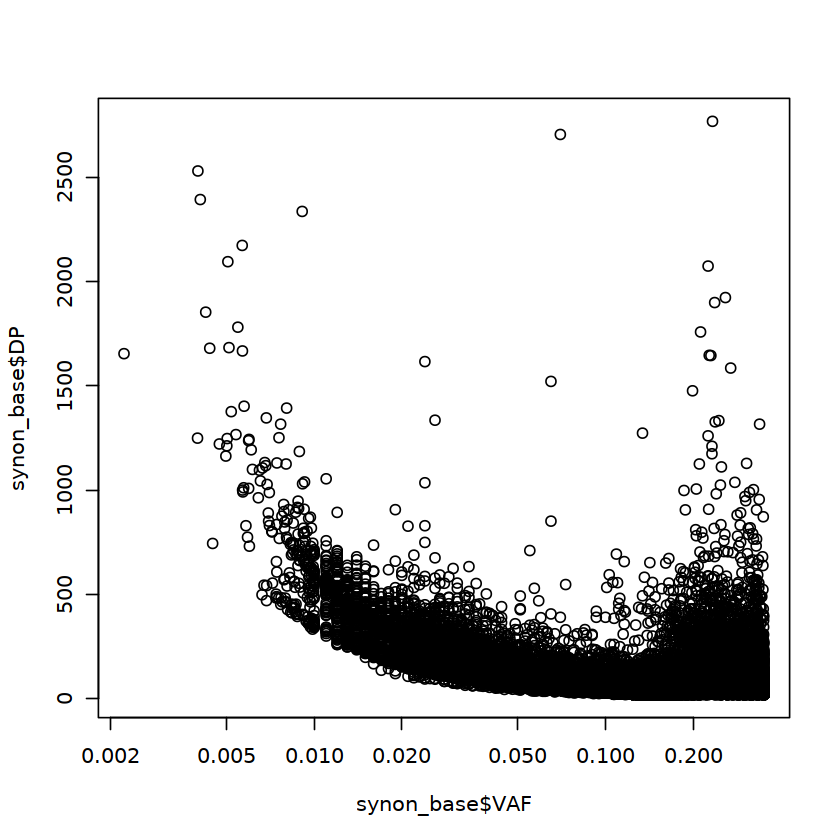

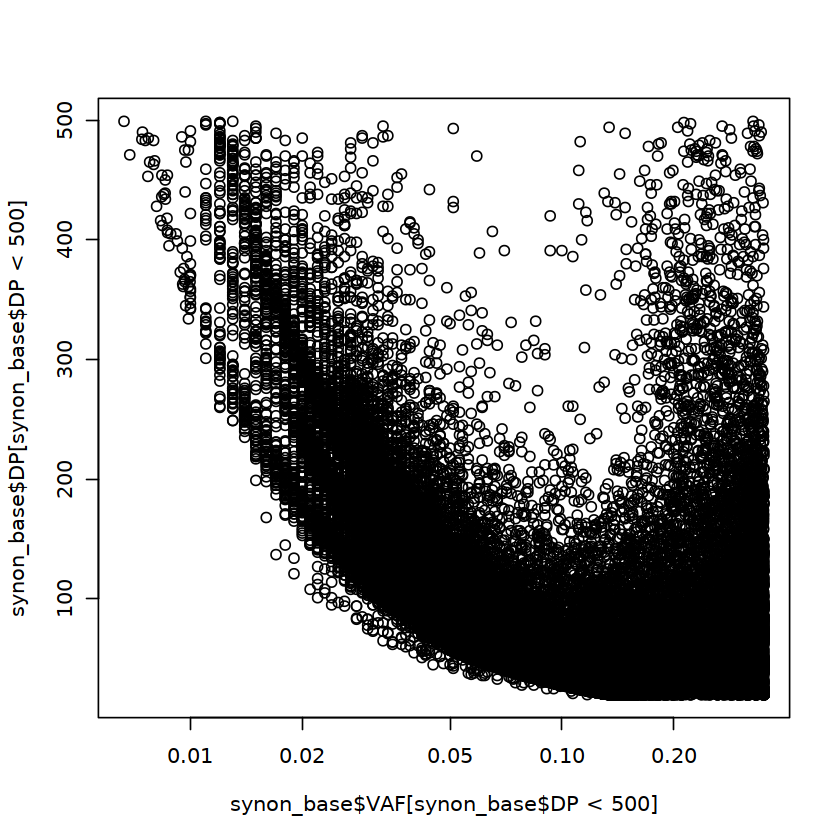

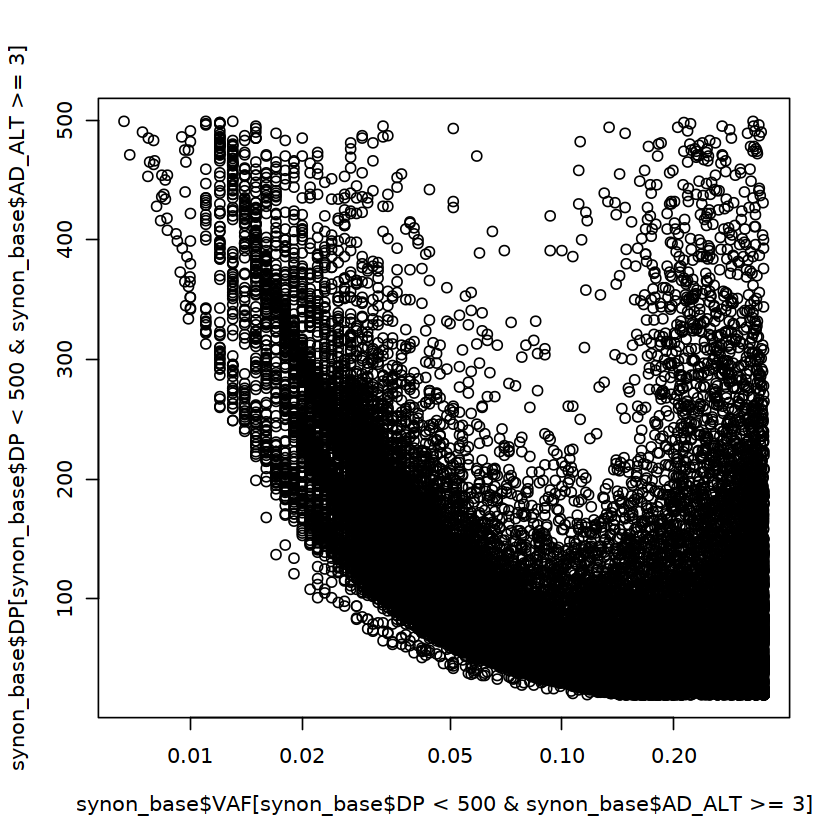

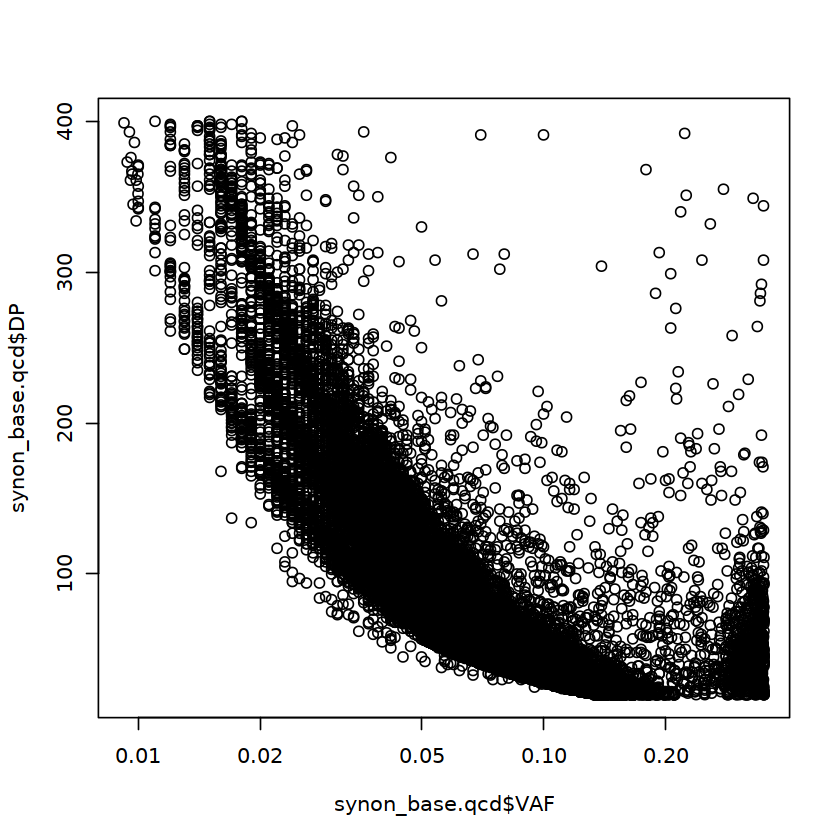

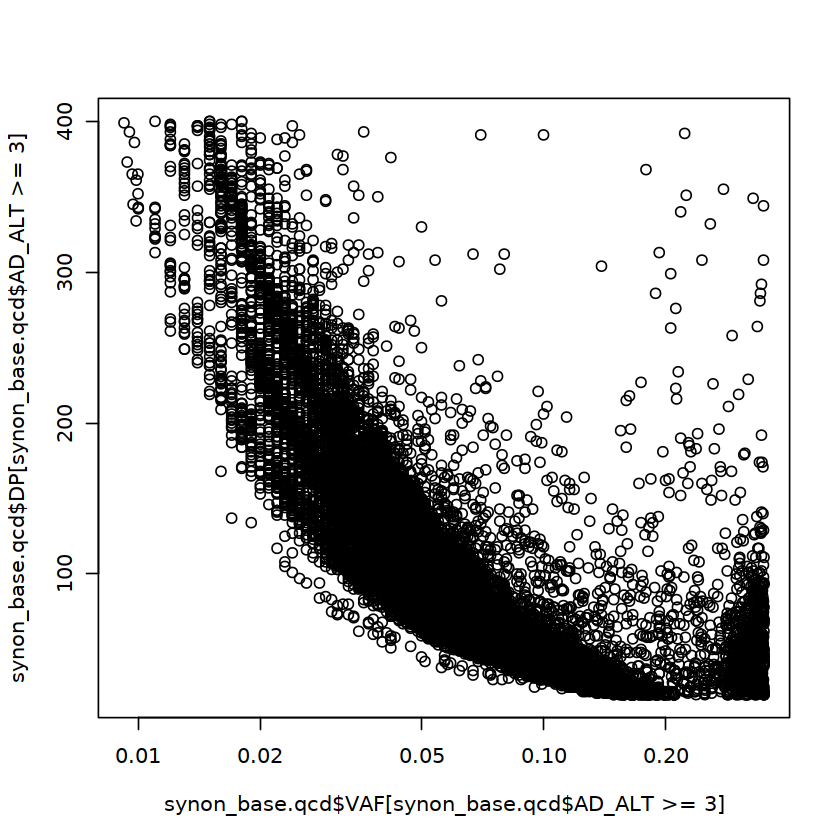

In [21]:
summary(synon_base$DP)
summary(synon_base.qcd$DP)
plot(synon_base$DP ~ synon_base$VAF, log="x")
plot(synon_base$DP[synon_base$DP<500] ~ synon_base$VAF[synon_base$DP<500], log="x")
plot(synon_base$DP[synon_base$DP<500 & synon_base$AD_ALT>=3] ~ synon_base$VAF[synon_base$DP<500 & synon_base$AD_ALT>=3], log="x")

plot(synon_base.qcd$DP ~ synon_base.qcd$VAF, log="x")
plot(synon_base.qcd$DP[synon_base.qcd$AD_ALT>=3] ~ synon_base.qcd$VAF[synon_base.qcd$AD_ALT>=3], log="x")


In [27]:
# ## variant count

# 

head(sort(table(synon_base$varID), decreasing = T),20)
head(sort(table(synon_base.qcd$varID), decreasing = T),20)
nVar.synon_base <- as.data.frame(table(synon_base$varID), stringsAsFactors = F)

nVar.synon_base_qcd <- as.data.frame(table(synon_base.qcd$varID), stringsAsFactors = F)

head(nVar.synon_base)
head(nVar.synon_base_qcd)
summary(nVar.synon_base$Freq)
summary(nVar.synon_base_qcd$Freq)
head(sort(nVar.synon_base$Freq, decreasing = T))
head(sort(nVar.synon_base_qcd$Freq, decreasing = T))


 chr19_54742155_G_A  chr3_195783285_G_A  chr3_195784125_G_A  chr5_141178814_C_T 
               1932                 297                 199                 135 
  chr11_1584674_T_G  chr20_34757941_C_T  chrX_107603250_G_A  chr12_52768989_A_G 
                109                  87                  69                  68 
 chr3_195784797_G_A    chr8_7358447_A_G  chr17_35844823_C_T   chr19_5144400_T_C 
                 68                  49                  44                  44 
  chr1_39770503_C_A chr10_133537139_C_G  chr16_70153462_C_T  chr10_46550227_T_C 
                 44                  40                  39                  38 
 chr10_46550311_G_A  chr22_22515325_C_G  chr3_195786555_G_T  chr3_195782949_A_G 
                 37                  33                  31                  30 


  chr9_20414282_G_A  chr14_94079488_C_T   chr19_8980155_A_G  chr19_31279334_G_A 
                 23                  15                   8                   5 
 chr19_54220739_C_A  chr16_84486980_G_T   chr1_13224869_C_T  chr3_150703803_T_C 
                  5                   4                   4                   4 
  chr4_87614990_T_C   chr7_89333477_T_C  chr10_48212077_T_C   chr11_4640462_T_C 
                  4                   4                   3                   3 
chr12_109241224_G_T  chr12_14788967_A_G  chr12_54000251_A_G  chr13_96986992_G_T 
                  3                   3                   3                   3 
 chr15_34793306_G_T  chr15_63669614_A_G  chr19_48874340_A_G  chr1_152314409_T_C 
                  3                   3                   3                   3 

,Var1,Freq
,<chr>,<int>
1,chr10_100048827_A_G,1
2,chr10_100076037_C_T,1
3,chr10_100152173_G_T,1
4,chr10_100152194_G_T,1
5,chr10_100174220_A_G,1
6,chr10_100204576_T_C,1


,Var1,Freq
,<chr>,<int>
1,chr10_100048827_A_G,1
2,chr10_100076037_C_T,1
3,chr10_100152173_G_T,1
4,chr10_100152194_G_T,1
5,chr10_100174220_A_G,1
6,chr10_100204576_T_C,1


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    1.000    1.000    1.079    1.000 1932.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.015   1.000  23.000 

[1] 1932  297  199  135  109   87

[1] 23 15  8  5  5  4

In [26]:
nVar.synon_base_qcd[which(nVar.synon_base_qcd$Freq>2),]

,Var1,Freq
,<chr>,<int>
1247,chr10_48212077_T_C,3
3867,chr11_4640462_T_C,3
6144,chr12_109241224_G_T,3
6851,chr12_14788967_A_G,3
7894,chr12_54000251_A_G,3
10235,chr13_96986992_G_T,3
12126,chr14_94079488_C_T,15
12496,chr15_34793306_G_T,3
13416,chr15_63669614_A_G,3


In [ ]:
synon_base_dp400_vaf25 <- synon_base %>% 

In [18]:
ls()

[1] "INT_yang2012"                                          
 [2] "aric_baseline_n_v05"                                   
 [3] "aric_baseline_n_v05.noPrevCH"                          
 [4] "cln_grt.vaf2.DP20_base.corrected"                      
 [5] "cln_grt.vaf2.DP20_base.corrected_ordered"              
 [6] "cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected"        
 [7] "cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered"
 [8] "cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected"          
 [9] "cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered"  
[10] "ref_genome"                                            
[11] "synon_base"                                            
[12] "synon_base.qcd"

## Regression Analyses

## Mutational Signature Analysis

In [21]:
## Mutation types:
mut_type <- function (nuc_subs) {
    muts <- nuc_subs
    types <- unlist(muts)
    types <- gsub("G>T", "C>A", types)
    types <- gsub("G>C", "C>G", types)
    types <- gsub("G>A", "C>T", types)
    types <- gsub("A>T", "T>A", types)
    types <- gsub("A>G", "T>C", types)
    types <- gsub("A>C", "T>G", types)
    return(types)
}

In [6]:
# BiocManager::install("BSgenome.Hsapiens.UCSC.hg38")
# BiocManager::install("MutationalPatterns")
ref_genome <- "BSgenome.Hsapiens.UCSC.hg38"

library(ref_genome, character.only = TRUE)

library("MutationalPatterns")
options(stringsAsFactors = F)
library(data.table)
library(GenomicRanges)
library(Rsamtools)
library(MASS)
library(VariantAnnotation)

Loading required package: BSgenome

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: 'S4Vectors'


The following object is masked from 'package:tidyr':

    expand


The following objects are masked from 'package:dplyr':

    first, rename


The fo

Spectrum / signature analysis using R MutationalPatterns
read_vcfs_as_granges()
mut_matrix()
mut_type_occurrences()
plot_spectrum()
Can discuss the next steps after spectrum is created with me/Zheming once there and when you decide if you want to use MutationalPatterns signature fitting, NMF de-novo, or MuSiCal mvNMF

In [17]:
head(synon_base.qcd)

Sample_ID,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GT,AD_REF,AD_ALT,VAF,DP,F1R2,F2R1,SB,varID,nuc_subs
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
A16369,chr3,150703803,.,T,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=23,6|2,5;DP=78;ECNT=1;GERMQ=36;MBQ=30,30;MFRL=167,187;MMQ=60,60;MPOS=27;POPAF=7.3;TLOD=6.96;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=ERICH6;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=ERICH6:NM_152394:exon1:c.A96G:p.E32E;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,0/1,29,7,0.180,36,"12,1","14,3","23,6,2,5",chr3_150703803_T_C,T>C
A16369,chr10,17114040,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=77,37|43,17;DP=177;ECNT=1;GERMQ=44;MBQ=30,30;MFRL=155,158;MMQ=60,60;MPOS=28;POPAF=7.3;TLOD=139.51;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=CUBN;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=CUBN:NM_001081:exon8:c.G870A:p.G290G;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,0/1,114,60,0.346,174,"47,23","65,36","77,37,43,17",chr10_17114040_C_T,C>T
A16382,chr3,58155973,.,G,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=18,8|8,4;DP=39;ECNT=1;GERMQ=19;MBQ=30,30;MFRL=160,167;MMQ=60,60;MPOS=27;POPAF=7.3;TLOD=27.55;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=FLNB;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=FLNB:NM_001164319:exon40:c.G6714C:p.V2238V,FLNB:NM_001164318:exon41:c.G6753C:p.V2251V,FLNB:NM_001457:exon41:c.G6786C:p.V2262V,FLNB:NM_001164317:exon42:c.G6879C:p.V2293V;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,0/1,26,12,0.333,38,"10,4","16,8","18,8,8,4",chr3_58155973_G_C,G>C
A16244,chr7,101033858,.,C,T,.,weak_evidence,"AS_FilterStatus=weak_evidence;AS_SB_TABLE=32,20|2,1;DP=59;ECNT=1;GERMQ=93;MBQ=30,30;MFRL=160,192;MMQ=60,60;MPOS=14;POPAF=7.3;TLOD=4.58;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=MUC17;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=MUC17:NM_001040105:exon3:c.C2442T:p.S814S;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,0/1,52,3,0.083,55,"24,2","26,1","32,20,2,1",chr7_101033858_C_T,C>T
A16244,chr11,20045119,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=43,28|5,6;DP=87;ECNT=1;GERMQ=93;MBQ=30,30;MFRL=176,147;MMQ=60,60;MPOS=28;POPAF=7.3;TLOD=20.36;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=NAV2;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=NAV2:NM_001111019:exon5:c.C609T:p.A203A,NAV2:NM_001111018:exon14:c.C3159T:p.A1053A,NAV2:NM_145117:exon14:c.C3351T:p.A1117A,NAV2:NM_182964:exon14:c.C3351T:p.A1117A,NAV2:NM_001244963:exon15:c.C3420T:p.A1140A;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,0/1,71,11,0.140,82,"36,4","35,7","43,28,5,6",chr11_20045119_C_T,C>T
A16244,chr19,8948114,.,A,G,.,weak_evidence,"AS_FilterStatus=weak_evidence;AS_SB_TABLE=27,53|1,2;

In [20]:
synon_base.qcd$context <- as.character(Biostrings::getSeq(BSgenome::getBSgenome(ref_genome), 
        synon_base.qcd$CHROM, synon_base.qcd$POS - 1, synon_base.qcd$POS + 1))
head(synon_base.qcd)

Sample_ID,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,...,AD_REF,AD_ALT,VAF,DP,F1R2,F2R1,SB,varID,nuc_subs,context
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A16369,chr3,150703803,.,T,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=23,6|2,5;DP=78;ECNT=1;GERMQ=36;MBQ=30,30;MFRL=167,187;MMQ=60,60;MPOS=27;POPAF=7.3;TLOD=6.96;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=ERICH6;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=ERICH6:NM_152394:exon1:c.A96G:p.E32E;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,29,7,0.180,36,"12,1","14,3","23,6,2,5",chr3_150703803_T_C,T>C,CTT
A16369,chr10,17114040,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=77,37|43,17;DP=177;ECNT=1;GERMQ=44;MBQ=30,30;MFRL=155,158;MMQ=60,60;MPOS=28;POPAF=7.3;TLOD=139.51;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=CUBN;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=CUBN:NM_001081:exon8:c.G870A:p.G290G;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,114,60,0.346,174,"47,23","65,36","77,37,43,17",chr10_17114040_C_T,C>T,CCC
A16382,chr3,58155973,.,G,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=18,8|8,4;DP=39;ECNT=1;GERMQ=19;MBQ=30,30;MFRL=160,167;MMQ=60,60;MPOS=27;POPAF=7.3;TLOD=27.55;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=FLNB;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=FLNB:NM_001164319:exon40:c.G6714C:p.V2238V,FLNB:NM_001164318:exon41:c.G6753C:p.V2251V,FLNB:NM_001457:exon41:c.G6786C:p.V2262V,FLNB:NM_001164317:exon42:c.G6879C:p.V2293V;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,26,12,0.333,38,"10,4","16,8","18,8,8,4",chr3_58155973_G_C,G>C,TGT
A16244,chr7,101033858,.,C,T,.,weak_evidence,"AS_FilterStatus=weak_evidence;AS_SB_TABLE=32,20|2,1;DP=59;ECNT=1;GERMQ=93;MBQ=30,30;MFRL=160,192;MMQ=60,60;MPOS=14;POPAF=7.3;TLOD=4.58;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=MUC17;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=MUC17:NM_001040105:exon3:c.C2442T:p.S814S;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,52,3,0.083,55,"24,2","26,1","32,20,2,1",chr7_101033858_C_T,C>T,GCA
A16244,chr11,20045119,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=43,28|5,6;DP=87;ECNT=1;GERMQ=93;MBQ=30,30;MFRL=176,147;MMQ=60,60;MPOS=28;POPAF=7.3;TLOD=20.36;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=NAV2;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=NAV2:NM_001111019:exon5:c.C609T:p.A203A,NAV2:NM_001111018:exon14:c.C3159T:p.A1053A,NAV2:NM_145117:exon14:c.C3351T:p.A1117A,NAV2:NM_182964:exon14:c.C3351T:p.A1117A,NAV2:NM_001244963:exon15:c.C3420T:p.A1140A;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,71,11,0.140,82,"36,4","35,7","43,28,5,6",chr11_20045119_C_T,C>T,CCA
A16244,chr19,8948114,.,A,G,.,weak_evidence,"AS_FilterStatus=wea

In [22]:
synon_base.qcd$mut_type <- mut_type(synon_base.qcd$nuc_subs)
head(synon_base.qcd)

Sample_ID,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,...,AD_ALT,VAF,DP,F1R2,F2R1,SB,varID,nuc_subs,context,mut_type
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A16369,chr3,150703803,.,T,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=23,6|2,5;DP=78;ECNT=1;GERMQ=36;MBQ=30,30;MFRL=167,187;MMQ=60,60;MPOS=27;POPAF=7.3;TLOD=6.96;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=ERICH6;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=ERICH6:NM_152394:exon1:c.A96G:p.E32E;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,7,0.180,36,"12,1","14,3","23,6,2,5",chr3_150703803_T_C,T>C,CTT,T>C
A16369,chr10,17114040,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=77,37|43,17;DP=177;ECNT=1;GERMQ=44;MBQ=30,30;MFRL=155,158;MMQ=60,60;MPOS=28;POPAF=7.3;TLOD=139.51;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=CUBN;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=CUBN:NM_001081:exon8:c.G870A:p.G290G;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,60,0.346,174,"47,23","65,36","77,37,43,17",chr10_17114040_C_T,C>T,CCC,C>T
A16382,chr3,58155973,.,G,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=18,8|8,4;DP=39;ECNT=1;GERMQ=19;MBQ=30,30;MFRL=160,167;MMQ=60,60;MPOS=27;POPAF=7.3;TLOD=27.55;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=FLNB;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=FLNB:NM_001164319:exon40:c.G6714C:p.V2238V,FLNB:NM_001164318:exon41:c.G6753C:p.V2251V,FLNB:NM_001457:exon41:c.G6786C:p.V2262V,FLNB:NM_001164317:exon42:c.G6879C:p.V2293V;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,12,0.333,38,"10,4","16,8","18,8,8,4",chr3_58155973_G_C,G>C,TGT,C>G
A16244,chr7,101033858,.,C,T,.,weak_evidence,"AS_FilterStatus=weak_evidence;AS_SB_TABLE=32,20|2,1;DP=59;ECNT=1;GERMQ=93;MBQ=30,30;MFRL=160,192;MMQ=60,60;MPOS=14;POPAF=7.3;TLOD=4.58;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=MUC17;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=MUC17:NM_001040105:exon3:c.C2442T:p.S814S;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,3,0.083,55,"24,2","26,1","32,20,2,1",chr7_101033858_C_T,C>T,GCA,C>T
A16244,chr11,20045119,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=43,28|5,6;DP=87;ECNT=1;GERMQ=93;MBQ=30,30;MFRL=176,147;MMQ=60,60;MPOS=28;POPAF=7.3;TLOD=20.36;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=NAV2;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=NAV2:NM_001111019:exon5:c.C609T:p.A203A,NAV2:NM_001111018:exon14:c.C3159T:p.A1053A,NAV2:NM_145117:exon14:c.C3351T:p.A1117A,NAV2:NM_182964:exon14:c.C3351T:p.A1117A,NAV2:NM_001244963:exon15:c.C3420T:p.A1140A;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,11,0.140,82,"36,4","35,7","43,28,5,6",chr11_20045119_C_T,C>T,CCA,C>T
A16244,chr19,8948114,.,A,G,.,weak_evidence,"AS_FilterStat

In [27]:
## correct sequence context

synon_base.qcd$mut_context <- synon_base.qcd$context 
head(synon_base.qcd)

x <- which(synon_base.qcd$nuc_subs != synon_base.qcd$mut_type)
y <- synon_base.qcd$context[x]
y <- IRanges::reverse(chartr("ATGC", "TACG", y))

synon_base.qcd$mut_context[x] <- y
head(synon_base.qcd)

Sample_ID,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,...,VAF,DP,F1R2,F2R1,SB,varID,nuc_subs,context,mut_type,mut_context
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A16369,chr3,150703803,.,T,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=23,6|2,5;DP=78;ECNT=1;GERMQ=36;MBQ=30,30;MFRL=167,187;MMQ=60,60;MPOS=27;POPAF=7.3;TLOD=6.96;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=ERICH6;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=ERICH6:NM_152394:exon1:c.A96G:p.E32E;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,0.180,36,"12,1","14,3","23,6,2,5",chr3_150703803_T_C,T>C,CTT,T>C,CTT
A16369,chr10,17114040,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=77,37|43,17;DP=177;ECNT=1;GERMQ=44;MBQ=30,30;MFRL=155,158;MMQ=60,60;MPOS=28;POPAF=7.3;TLOD=139.51;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=CUBN;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=CUBN:NM_001081:exon8:c.G870A:p.G290G;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,0.346,174,"47,23","65,36","77,37,43,17",chr10_17114040_C_T,C>T,CCC,C>T,CCC
A16382,chr3,58155973,.,G,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=18,8|8,4;DP=39;ECNT=1;GERMQ=19;MBQ=30,30;MFRL=160,167;MMQ=60,60;MPOS=27;POPAF=7.3;TLOD=27.55;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=FLNB;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=FLNB:NM_001164319:exon40:c.G6714C:p.V2238V,FLNB:NM_001164318:exon41:c.G6753C:p.V2251V,FLNB:NM_001457:exon41:c.G6786C:p.V2262V,FLNB:NM_001164317:exon42:c.G6879C:p.V2293V;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,0.333,38,"10,4","16,8","18,8,8,4",chr3_58155973_G_C,G>C,TGT,C>G,TGT
A16244,chr7,101033858,.,C,T,.,weak_evidence,"AS_FilterStatus=weak_evidence;AS_SB_TABLE=32,20|2,1;DP=59;ECNT=1;GERMQ=93;MBQ=30,30;MFRL=160,192;MMQ=60,60;MPOS=14;POPAF=7.3;TLOD=4.58;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=MUC17;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=MUC17:NM_001040105:exon3:c.C2442T:p.S814S;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,0.083,55,"24,2","26,1","32,20,2,1",chr7_101033858_C_T,C>T,GCA,C>T,GCA
A16244,chr11,20045119,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=43,28|5,6;DP=87;ECNT=1;GERMQ=93;MBQ=30,30;MFRL=176,147;MMQ=60,60;MPOS=28;POPAF=7.3;TLOD=20.36;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=NAV2;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=NAV2:NM_001111019:exon5:c.C609T:p.A203A,NAV2:NM_001111018:exon14:c.C3159T:p.A1053A,NAV2:NM_145117:exon14:c.C3351T:p.A1117A,NAV2:NM_182964:exon14:c.C3351T:p.A1117A,NAV2:NM_001244963:exon15:c.C3420T:p.A1140A;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,0.140,82,"36,4","35,7","43,28,5,6",chr11_20045119_C_T,C>T,CCA,C>T,CCA
A16244,chr19,8948114,.,A,G,.,weak_evidence,"A

Sample_ID,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,...,VAF,DP,F1R2,F2R1,SB,varID,nuc_subs,context,mut_type,mut_context
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A16369,chr3,150703803,.,T,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=23,6|2,5;DP=78;ECNT=1;GERMQ=36;MBQ=30,30;MFRL=167,187;MMQ=60,60;MPOS=27;POPAF=7.3;TLOD=6.96;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=ERICH6;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=ERICH6:NM_152394:exon1:c.A96G:p.E32E;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,0.180,36,"12,1","14,3","23,6,2,5",chr3_150703803_T_C,T>C,CTT,T>C,CTT
A16369,chr10,17114040,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=77,37|43,17;DP=177;ECNT=1;GERMQ=44;MBQ=30,30;MFRL=155,158;MMQ=60,60;MPOS=28;POPAF=7.3;TLOD=139.51;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=CUBN;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=CUBN:NM_001081:exon8:c.G870A:p.G290G;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,0.346,174,"47,23","65,36","77,37,43,17",chr10_17114040_C_T,C>T,CCC,C>T,CCC
A16382,chr3,58155973,.,G,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=18,8|8,4;DP=39;ECNT=1;GERMQ=19;MBQ=30,30;MFRL=160,167;MMQ=60,60;MPOS=27;POPAF=7.3;TLOD=27.55;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=FLNB;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=FLNB:NM_001164319:exon40:c.G6714C:p.V2238V,FLNB:NM_001164318:exon41:c.G6753C:p.V2251V,FLNB:NM_001457:exon41:c.G6786C:p.V2262V,FLNB:NM_001164317:exon42:c.G6879C:p.V2293V;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,0.333,38,"10,4","16,8","18,8,8,4",chr3_58155973_G_C,G>C,TGT,C>G,ACA
A16244,chr7,101033858,.,C,T,.,weak_evidence,"AS_FilterStatus=weak_evidence;AS_SB_TABLE=32,20|2,1;DP=59;ECNT=1;GERMQ=93;MBQ=30,30;MFRL=160,192;MMQ=60,60;MPOS=14;POPAF=7.3;TLOD=4.58;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=MUC17;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=MUC17:NM_001040105:exon3:c.C2442T:p.S814S;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,0.083,55,"24,2","26,1","32,20,2,1",chr7_101033858_C_T,C>T,GCA,C>T,GCA
A16244,chr11,20045119,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=43,28|5,6;DP=87;ECNT=1;GERMQ=93;MBQ=30,30;MFRL=176,147;MMQ=60,60;MPOS=28;POPAF=7.3;TLOD=20.36;ANNOVAR_DATE=2020-06-08;Func.refGene=exonic;Gene.refGene=NAV2;GeneDetail.refGene=.;ExonicFunc.refGene=synonymous_SNV;AAChange.refGene=NAV2:NM_001111019:exon5:c.C609T:p.A203A,NAV2:NM_001111018:exon14:c.C3159T:p.A1053A,NAV2:NM_145117:exon14:c.C3351T:p.A1117A,NAV2:NM_182964:exon14:c.C3351T:p.A1117A,NAV2:NM_001244963:exon15:c.C3420T:p.A1140A;avsnp150=.;cosmic70=.;AF=.;AF_popmax=.;AF_male=.;AF_female=.;AF_raw=.;AF_afr=.;AF_sas=.;AF_amr=.;AF_eas=.;AF_nfe=.;AF_fin=.;AF_asj=.;AF_oth=.;non_topmed_AF_popmax=.;non_neuro_AF_popmax=.;non_cancer_AF_popmax=.;controls_AF_popmax=.;ALLELE_END",GT:AD:AF:DP:F1R2:F2R1:SB,...,0.140,82,"36,4","35,7","43,28,5,6",chr11_20045119_C_T,C>T,CCA,C>T,CCA
A16244,chr19,8948114,.,A,G,.,weak_evidence,"A

In [29]:
# Step 1: Install and load the necessary packages
# install.packages("deconstructSigs")
library(deconstructSigs)

# Step 2: Load your data
# Replace this with the actual path to your data
# data_path <- "path_to_your_data.csv"
# data <- read.csv(data_path)

# Step 3: Convert your data into the format required for signature analysis
input <- mut.to.sigs.input(mut.ref = synon_base.qcd, 
                           sample.id = "Sample_ID",
                           chr = "CHROM",
                           pos = "POS",
                           ref = "REF",
                           alt = "ALT", 
                           bsg = BSgenome.Hsapiens.UCSC.hg38::BSgenome.Hsapiens.UCSC.hg38)

# Step 4: Determine the contribution of known signatures to your data
signatures <- whichSignatures(tumor.ref = input, 
                              signatures.ref = signatures.cosmic,)

# Step 5: Plot the results
plotSignatures(signatures)

Warning message in mut.to.sigs.input(mut.ref = synon_base.qcd, sample.id = "Sample_ID", :
"Some samples have fewer than 50 mutations:
  A16369, A16382, A16244, A15327, A16346, A16350, A15814, A16187, A16338, A15392, A16367, A16359, A16317, A15522, A16394, A16356, A16292, A16374, A16304, A16410, A16300, A16390, A16347, A15914, A16372, A16285, A16391, A16437, A16345, A16380, A16421, A16337, A16413, A15874, A16302, A16447, A16429, A16461, A16324, A16417, A16232, A16331, A16448, A16431, A16378, A16401, A16309, A16433, A16436, A16290, A16456, A16423, A16297, A14787, A16489, A15553, A16441, CIPA00411, A16352, A16384, A16407, A16325, A16257, CIPA00171, A16333, CIPA00622, A16414, A16416, A15659, A16358, A16415, A16438, A16445, A16463, CIPA00568, CIPA00963, A16426, A16425, CIPA00975, A16444, A15451, CIPA00946, A16281, A15577, CIPA01211, CIPA01135, A16396, A16464, A15230, CIPA01020, A15663, CIPA00480, CIPA01412, A15411, A16406, A16371, CIPA00582, A15487, A16383, A16454, A15887, CIPA01376, A15692

ERROR: Error in sample.id %in% rownames(tumor): argument "sample.id" is missing, with no default


In [37]:
sort(colSums(input))

table(rowSums(input)>=50)

A[C>A]T A[C>G]T A[T>A]T A[T>G]C A[T>G]T G[T>A]T A[T>G]A G[T>G]A G[T>G]T T[T>G]T 
      0       0       0       0       0       1       3       3       3       3 
A[C>G]C T[T>A]T C[T>G]A A[C>G]G T[C>G]G A[T>A]A A[T>A]C T[T>G]A C[T>G]T A[T>G]G 
      4       4       4       5       5       6       6       7       8      10 
A[C>G]A G[C>G]C T[C>G]T G[T>G]C T[T>G]C G[C>G]G G[C>G]T T[T>A]A G[T>A]C T[C>G]C 
     11      11      11      11      12      13      13      13      15      16 
C[T>G]C C[C>G]T G[T>A]A T[T>A]C C[C>G]C T[T>G]G A[C>A]C G[C>G]A C[C>G]G C[T>G]G 
     16      19      22      25      27      27      30      31      32      34 
G[T>G]G C[C>G]A A[T>A]G T[C>G]A T[T>A]G G[T>A]G C[T>A]A C[T>A]T A[C>A]G T[C>T]G 
     35      39      40      41      50      52      53      60      64      64 
A[C>T]G C[T>A]C C[C>T]G A[C>A]A T[C>A]T A[T>C]A G[C>T]G T[T>C]A G[C>A]T T[C>A]G 
     81      83      96      98     188     203     210     228     237     249 
C[T>A]G T[C>A]C A[C>T]T G[C>A]C G[C>A]G G[T>C]A T[T>C]G A[T>C]G A[C>T]C T[C>T]T 
    374     376     377     381     384     401     470     478     546     641 
C[C>A]T G[C>A]A T[C>T]C C[T>C]A G[C>T]T C[C>A]G T[C>A]A A[C>T]A G[C>T]C C[C>T]T 
    652     723     742     799     854     867     879     899     954     969 
A[T>C]T C[C>T]C T[C>T]A A[T>C]C G[C>T]A C[C>A]C G[T>C]G T[T>C]T T[T>C]C C[C>A]A 
   1092    1113    1190    1286    1355    1367    1463    1864    2016    2294 
C[T>C]G C[C>T]A G[T>C]C G[T>C]T C[T>C]C C[T>C]T 
   2642    2695    3190    3744    6802   10701


FALSE  TRUE 
 7767   131 

In [ ]:

(table(synon_base$FILTER))

table(table(synon_base$Sample_ID[synon_base$FILTER %in% c("PASS", "weak_evidence")]))

In [16]:
  # 3. Counting subs
  freqs = table(paste(mutations$sub,paste(substr(mutations$trinuc_ref_py,1,1),substr(mutations$trinuc_ref_py,3,3),sep="-"),sep=","))
  sub_vec = c("C>A","C>G","C>T","T>A","T>C","T>G")
  ctx_vec = paste(rep(c("A","C","G","T"),each=4),rep(c("A","C","G","T"),times=4),sep="-")
  full_vec = paste(rep(sub_vec,each=16),rep(ctx_vec,times=6),sep=",")
  freqs_full = freqs[full_vec]; freqs_full[is.na(freqs_full)] = 0; names(freqs_full) = full_vec
  
  xstr = paste(substr(full_vec,5,5), substr(full_vec,1,1), substr(full_vec,7,7), sep="")
  
  if(is.null(save)){dev.new(width=12,height=4)}
  colvec = rep(c("dodgerblue","black","red","grey70","olivedrab3","plum2"),each=16)
  y = freqs_full; maxy = max(y)
  h = barplot(y, las=2, col=colvec, border=NA, ylim=c(0,maxy*1.5), space=1, cex.names=0.6, names.arg=xstr, ylab="Number of mutations", main=paste0("Total number of mutations: ",nrow(mutations),add_to_title))
  for (j in 1:length(sub_vec)) {
    xpos = h[c((j-1)*16+1,j*16)]
    rect(xpos[1]-0.5, maxy*1.2, xpos[2]+0.5, maxy*1.3, border=NA, col=colvec[j*16])
    text(x=mean(xpos), y=maxy*1.3, pos=3, label=sub_vec[j])
  } 
  if(!is.null(save)){ 
    dev.copy(pdf,save,width=12,height=4); dev.off()}


Loading required package: NMF

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [OK] | Cores 2/2


Attaching package: 'NMF'


The following object is masked from 'package:S4Vectors':

    nrun




In [ ]:
(table(synon_base$FORMAT))

In [ ]:

synon_base <- synon_base %>% filter(FORMAT== "GT:AD:AF:DP:F1R2:F2R1:SB") %>% separate(GT, c("GT","AD","AF","DP","F1R2","F2R1", "SB"), ":", convert = TRUE)

str(synon_base)


In [ ]:
names(synon_base)

In [ ]:
synon_base$VAF <- as.numeric(synon_base$AF)
summary(synon_base$VAF)

In [ ]:
synon_base$varID <- paste(synon_base$CHROM, synon_base$POS, synon_base$REF, synon_base$ALT, sep="_")

In [ ]:
## PASS or weak_evidence
synon_base_count <- synon_base %>% filter(FILTER %in% c("PASS", "weak_evidence") ) %>%
  group_by(Sample_ID) %>% 
  summarise(nSynonymous=n(), 
            varid=paste(varID, collapse = ";"))

head(synon_base_count)

## CHIP 

In [ ]:
## Baseline pop
aric_baseline_full_noPrevHeme <-  fread("/medpop/esp2/mesbah/projects/ch_progression/aric/pheno/aric_baseline_N10881.pheno_ch_status_bp_heme.noHemeCA.10May2023.csv", 
                                        header=T)
##     # qcd CH variants with phenotypes
ch_var_in_baseline_qcd.pheno <- fread("/medpop/esp2/mesbah/projects/ch_progression/aric/pheno/ch_var_in_baseline_qcd_pheno.23Mar2023.csv", header = T)

str(aric_baseline_full_noPrevHeme)

str(ch_var_in_baseline_qcd.pheno)

In [ ]:

table(aric_baseline_full_noPrevHeme$gwasid %in% synon_base_count$Sample_ID)

table(ch_var_in_baseline_qcd.pheno$GWAS_ID %in% synon_base_count$Sample_ID)


In [ ]:
aric_baseline_full_noPrevHeme_synon <- merge(aric_baseline_full_noPrevHeme, 
                                             synon_base_count, 
                                             by.x="gwasid", by.y= "Sample_ID", 
                                             all.x=T)

head(aric_baseline_full_noPrevHeme_synon)
                                             

In [ ]:
INT_yang2012 <- function(x){
  y<-qnorm((rank(x,na.last='keep')-0.5)/sum(!is.na(x)))
  return(y)
}

In [ ]:
aric_baseline_full_noPrevHeme_synon$INT_nSynonymous <- INT_yang2012(aric_baseline_full_noPrevHeme_synon$nSynonymous)

In [ ]:
hist(aric_baseline_full_noPrevHeme_synon$nSynonymous, breaks = 100)

hist(aric_baseline_full_noPrevHeme_synon$INT_nSynonymous, breaks = 100)

In [ ]:
plot(aric_baseline_full_noPrevHeme_synon$age_base, aric_baseline_full_noPrevHeme_synon$INT_nSynonymous)

summary(lm(INT_nSynonymous ~ age_base, data = aric_baseline_full_noPrevHeme_synon))



In [ ]:
names(aric_baseline_full_noPrevHeme_synon)

In [ ]:
summary(glm(CH_baseline ~ age_base + nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))

summary(glm(CH_baseline ~ age_base + scale(nSynonymous), data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))

summary(glm(CHvaf10_baseline ~ age_base + nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))

summary(glm(CH_baseline_v05 ~ age_base + nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))

summary(glm(CH_DTA ~ age_base + nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))

summary(glm(CH_DNMT3A ~ age_base + nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))


summary(glm(CH_TET2 ~ age_base + nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))


summary(glm(CH_ASXL1 ~ age_base + nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))


summary(glm(CH_DDR ~ age_base + nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))

summary(glm(CH_SF ~ age_base + nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))


In [ ]:
summary(glm(CH_baseline ~ age_base + INT_nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))

summary(glm(CH_baseline ~ age_base + scale(INT_nSynonymous), data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))

summary(glm(CHvaf10_baseline ~ age_base + INT_nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))

summary(glm(CH_baseline_v05 ~ age_base + INT_nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))

summary(glm(CH_DTA ~ age_base + INT_nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))

summary(glm(CH_DNMT3A ~ age_base + INT_nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))


summary(glm(CH_TET2 ~ age_base + INT_nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))


summary(glm(CH_ASXL1 ~ age_base + INT_nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))


summary(glm(CH_DDR ~ age_base + INT_nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))

summary(glm(CH_SF ~ age_base + INT_nSynonymous, data = aric_baseline_full_noPrevHeme_synon, family = "binomial"))


In [ ]:
cor(aric_baseline_full_noPrevHeme_synon$nSynonymous, 
    aric_baseline_full_noPrevHeme_synon$CH_baseline, 
    use = "complete", method="pearson")


cor(aric_baseline_full_noPrevHeme_synon$nSynonymous, 
    aric_baseline_full_noPrevHeme_synon$CH_baseline, 
    use = "complete", method="kendall")

cor(aric_baseline_full_noPrevHeme_synon$nSynonymous, 
    aric_baseline_full_noPrevHeme_synon$CH_baseline, 
    use = "complete", method="spearman")

In [ ]:
cor(aric_baseline_full_noPrevHeme_synon$INT_nSynonymous, 
    aric_baseline_full_noPrevHeme_synon$CH_baseline, 
    use = "complete", method="pearson")


cor(aric_baseline_full_noPrevHeme_synon$INT_nSynonymous, 
    aric_baseline_full_noPrevHeme_synon$CH_baseline, 
    use = "complete", method="kendall")

cor(aric_baseline_full_noPrevHeme_synon$INT_nSynonymous, 
    aric_baseline_full_noPrevHeme_synon$CH_baseline, 
    use = "complete", method="spearman")